<a href="https://colab.research.google.com/github/harsh7781/Machine-Learning/blob/main/hierarchical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataR2.csv to dataR2.csv


In [ ]:
import pandas as pd
data = pd.read_csv("dataR2.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#Normalizing Data
from sklearn.preprocessing import normalize
norm_data = normalize(data)
norm_data = pd.DataFrame(norm_data, columns=data.columns)
norm_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.112519,0.055087,0.164090,0.006346,0.001096,0.020645,0.022744,0.018743,0.977772,0.002344
1,0.170970,0.042620,0.189509,0.006417,0.001456,0.018217,0.011184,0.008371,0.965642,0.002060
2,0.144023,0.040616,0.159831,0.007900,0.001773,0.031508,0.039399,0.016294,0.974260,0.001756
3,0.072781,0.022870,0.082414,0.003453,0.000656,0.010578,0.007674,0.013664,0.993487,0.001070
4,0.109623,0.026910,0.117271,0.004524,0.001027,0.008540,0.006143,0.013482,0.986504,0.001275


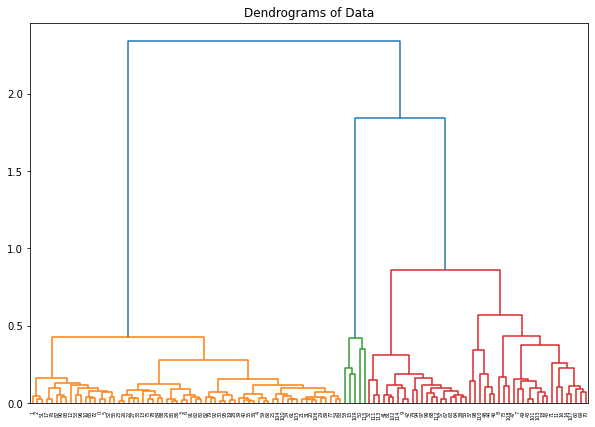

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Dendrograms of Data")
dendrogram = shc.dendrogram(shc.linkage(norm_data, method='ward'))


In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
clusters.fit_predict(norm_data)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

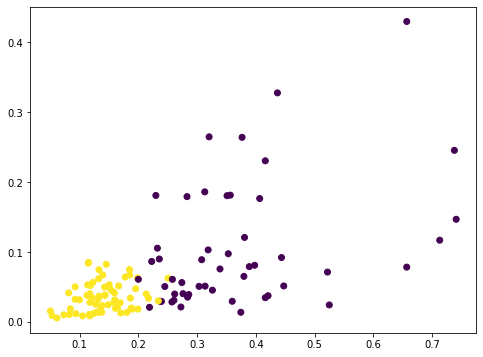

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(norm_data['Glucose'],norm_data['Leptin'],c=clusters.labels_)